# Рынок заведений общественного питания Москвы

# Описание проекта
Исследование рынка для небольшого кафе с роботами-официантами. Необходимо провести исследование рынка общественного питания в Москве по отткрытым данным для оценки текущего положения дел в этой сфере. 

# Обзор данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re

sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

pd.options.display.max_colwidth = 1

try:
    data = pd.read_csv('/datasets/rest_data.csv')
except:
    data = pd.read_csv('datasets/rest_data.csv')

In [2]:
display(data.head())
data.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


На первый взгляд, данные выглядят нормально. Типы данных соответствуют ячейке, названия колонок в удобном формате, данные выглядят правильно. Проверим пару моментов:

In [3]:
print(f'Количество полных дубликатов: {data.duplicated().sum()}')

Количество полных дубликатов: 0


In [4]:
print(f'Количество пропусков: {data.isna().sum()}')

Количество пропусков: id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64


Ни дубликатов, ни пропусков.

In [5]:
print(data['id'].value_counts())
print('')
print(data['object_name'].value_counts())
print('')
print(data['chain'].value_counts())
print('')
print(data['object_type'].value_counts())
print('')
print(data['address'].value_counts())
print('')
print(data['number'].value_counts())

163840    1
207007    1
58806     1
198074    1
150035    1
         ..
29419     1
69506     1
23278     1
185071    1
167934    1
Name: id, Length: 15366, dtype: int64

Столовая                              267
Кафе                                  236
Шаурма                                234
KFC                                   155
Шоколадница                           142
                                     ... 
Лачи                                  1  
Ресторан «КОРАЛЛ»                     1  
Frank by Баста                        1  
Кафе Оджахури                         1  
Кафе «ЦЕНТРАЛЬНЫЙ ДОМ ЛИТЕРАТОРОВ»    1  
Name: object_name, Length: 10393, dtype: int64

нет    12398
да     2968 
Name: chain, dtype: int64

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                  856 
буфет                                585 
кафетерий     

Колонки в порядке, все данные похожи на правду. Подозрения вызывают только места без посадочных мест. Это может быть как ошибкой при вводе данных, так и расположение в ТЦ с общими столиками. Не совсем понятно, как можно использовать эти данные, лучше от них избавиться для чистоты анализа, благо, этих мест чуть больше 1% от общего числа.

In [6]:
data = data[data['number']>0]

In [7]:
display(data.head())
data.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13745 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           13745 non-null  int64 
 1   object_name  13745 non-null  object
 2   chain        13745 non-null  object
 3   object_type  13745 non-null  object
 4   address      13745 non-null  object
 5   number       13745 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 751.7+ KB


Подготовленные данные выглядят хорошо. Начнем анализ.

# Анализ данных
Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

Для какого вида объекта общественного питания характерно сетевое распространение?

Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

Выделите в отдельный столбец информацию об улице из столбца address .

Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

## Исследование соотношения видов объектов общественного питания по количеству.

,object_type,counts
0,кафе,5789
1,столовая,2568
2,ресторан,2240
3,предприятие быстрого обслуживания,1219
4,бар,828
5,буфет,517
6,кафетерий,285
7,закусочная,171
8,магазин (отдел кулинарии),128


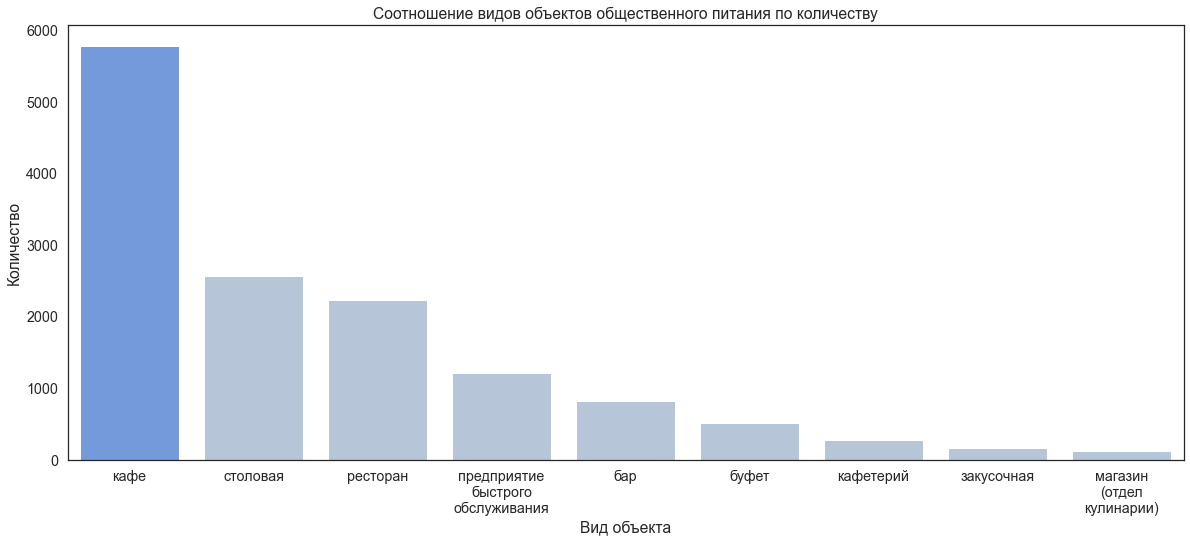

In [8]:
object_type_data = data['object_type'].value_counts().rename_axis('object_type').reset_index(name='counts')
display(object_type_data)

#Задаем цвет, размер шрифта и размер графика
sns.set_theme(style="white", font_scale=1.3)
fig, ax = plt.subplots(figsize=(20, 8))

#Выделяем только победителя
values = object_type_data['counts']
clrs = ['lightsteelblue' if (x < max(values)) else 'cornflowerblue' for x in values]

#Строим график с подписями
sns.barplot(x='object_type', y='counts', data=object_type_data, palette=clrs)
ax.set_title('Cоотношение видов объектов общественного питания по количеству')
plt.xlabel(u'Вид объекта')
plt.ylabel(u'Количество')

#Делаем перенос длинных названий
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

wrap_labels(ax, 10)
ax.figure;

Больше всего заведений типа "кафе" (их 5789) , вдвое меньше "столовая" (2568) и "ресторан" (2240 заведений). Остальные типа заведений составляют менее значительную часть от общего числа.

## Исследование соотношения сетевых и несетевых заведений по количеству.

,chain,counts
0,нет,11045
1,да,2700


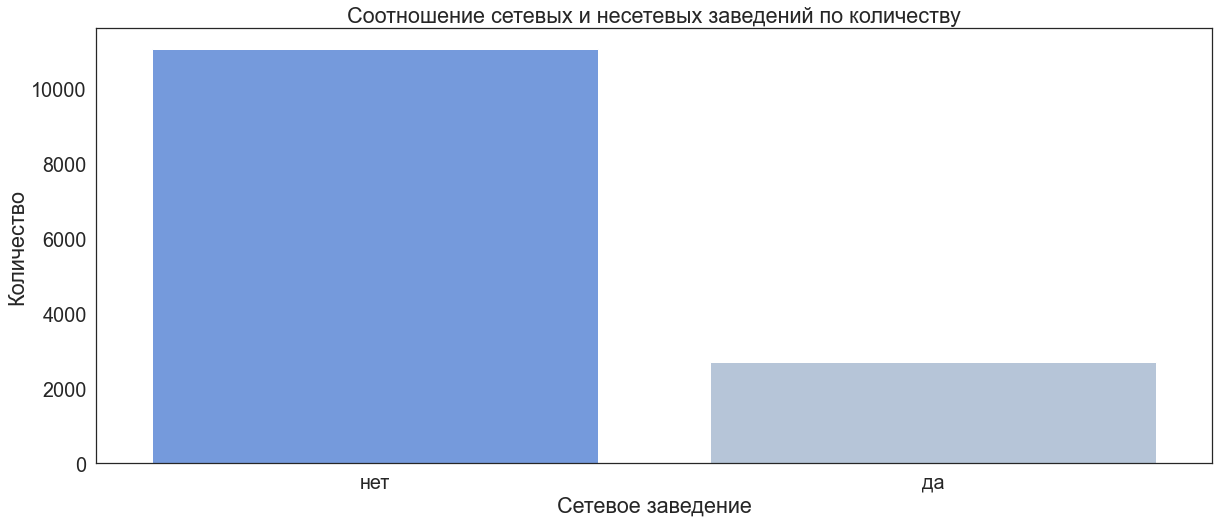

In [9]:
chain_data = data['chain'].value_counts().rename_axis('chain').reset_index(name='counts')
display(chain_data)

#Задаем цвет, размер шрифта и размер графика
sns.set_theme(style="white", font_scale=1.8)
fig, ax = plt.subplots(figsize=(20, 8))

#Выделяем только победителя
values = chain_data['counts']
clrs = ['lightsteelblue' if (x < max(values)) else 'cornflowerblue' for x in values]

#Строим график
sns.barplot(x='chain', y='counts', data=chain_data, palette=clrs)
plt.title('Cоотношение сетевых и несетевых заведений по количеству')
plt.xlabel(u'Сетевое заведение')
plt.ylabel(u'Количество');

В 4 раза больше несетевых заведений (11045) , чем сетевых (2700).

## Для какого вида объекта общественного питания характерно сетевое распространение?

,object_type,chain,no_chain,chain_ratio
6,предприятие быстрого обслуживания,671,548,0.550451
5,магазин (отдел кулинарии),45,83,0.351562
7,ресторан,526,1714,0.234821
3,кафе,1341,4448,0.231646
2,закусочная,38,133,0.222222
4,кафетерий,37,248,0.129825
0,бар,36,792,0.043478
1,буфет,3,514,0.005803
8,столовая,3,2565,0.001168


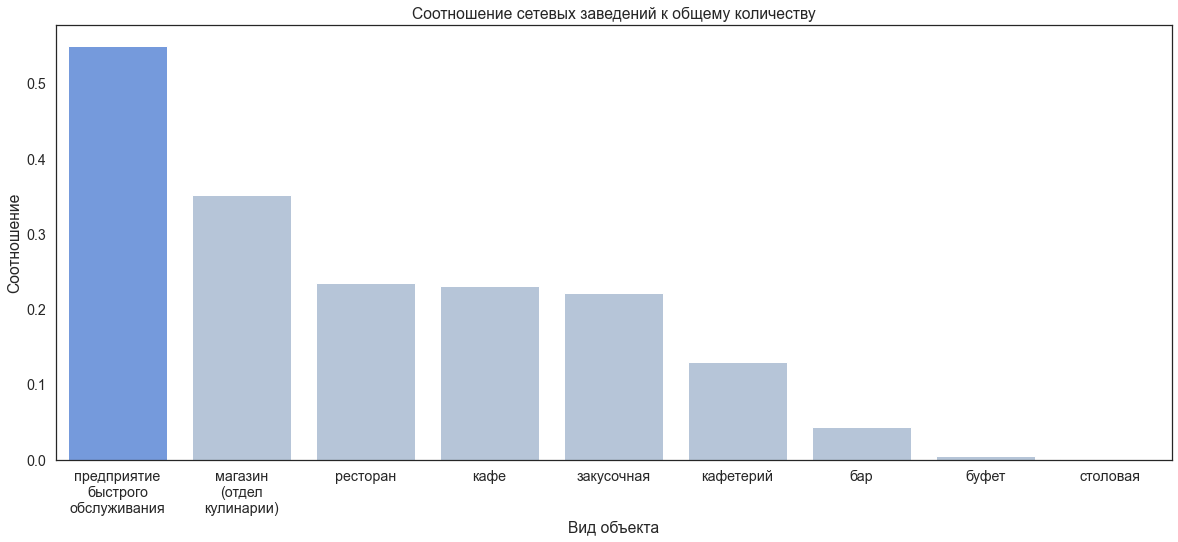

In [10]:
chain_objects = data.pivot_table(index='object_type', columns='chain',values='id', aggfunc='count').reset_index()
chain_objects.columns = ['object_type', 'chain', 'no_chain']
#chain_objects = chain_objects[chain_objects['chain'] > chain_objects['no_chain']]
chain_objects['chain_ratio'] = chain_objects['chain'] / (chain_objects[['chain', 'no_chain']].sum(axis=1))
chain_objects = chain_objects.sort_values(by='chain_ratio', ascending=False)

display(chain_objects)

#Задаем цвет, размер шрифта и размер графика
sns.set_theme(style="white", font_scale=1.3)
fig, ax = plt.subplots(figsize=(20, 8))

#Выделяем только победителя
values = chain_objects['chain_ratio']
clrs = ['lightsteelblue' if (x < max(values)) else 'cornflowerblue' for x in values]

#Строим график с подписями
sns.barplot(x='object_type', y='chain_ratio', data=chain_objects, palette=clrs)
ax.set_title('Соотношение сетевых заведений к общему количеству')
plt.xlabel(u'Вид объекта')
plt.ylabel(u'Соотношение')

#Делаем перенос длинных названий
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

wrap_labels(ax, 10)
ax.figure;

Для предприятий быстрого обслуживания наиболее характерно сетевое распространение (больше половины заведений этого типа), большинство остальных типов общепита на 70-80% состоят из несетвых точек.

## Что характерно для сетевых заведений: 
много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

,object_name,id,number
7843,Столовая,266,73.518797
3579,Кафе,226,28.181416
569,KFC,146,58.753425
9518,Шоколадница,142,56.112676
5357,Макдоналдс,113,87.991150


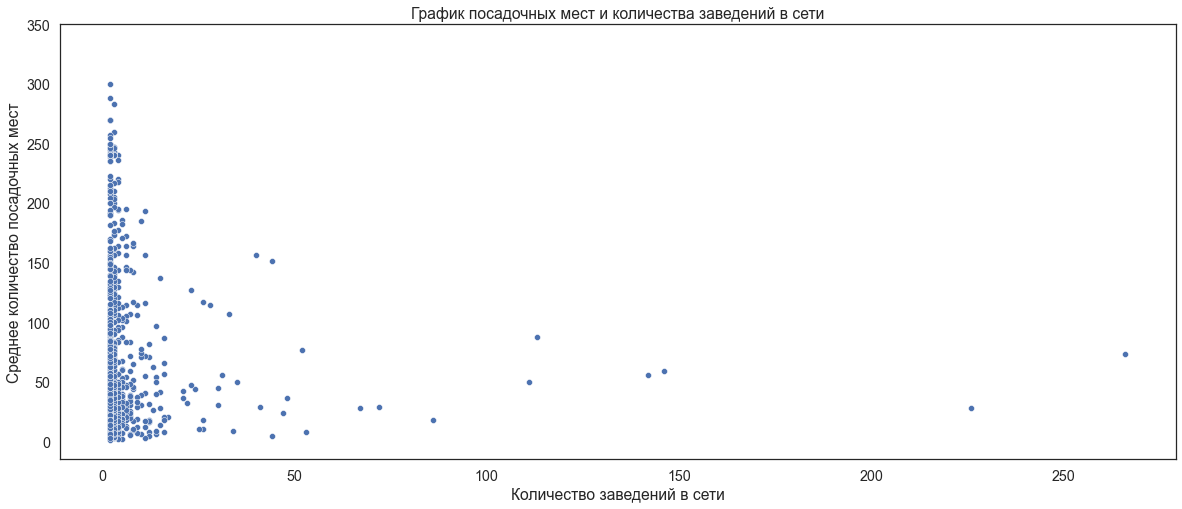

In [11]:
chain_number = (
    data
    .groupby('object_name')
    .agg({'id':'count', 'number':'mean'})
    .reset_index()
    .sort_values(by='id', ascending=False)
)
chain_number = chain_number[chain_number['id']>1]

display(chain_number.head())

plt.subplots(figsize=(20, 8))
sns.scatterplot(x= 'id', y='number', data=chain_number).set_ylim(-15, 350)
plt.title('График посадочных мест и количества заведений в сети')
plt.xlabel(u'Количество заведений в сети')
plt.ylabel(u'Среднее количество посадочных мест');

Для сетевых общепитов характерно характерно небольшое (1-20 точек) количество заведений с большим (до 250) количеством посадочных мест.

## Среднее количество посадочных мест для каждого вида объекта общественного питания . 

,object_type,number
8,столовая,131.210280
7,ресторан,98.779464
1,буфет,57.854932
0,бар,44.964976
3,кафе,41.842805
6,предприятие быстрого обслуживания,32.421657
2,закусочная,16.017544
4,кафетерий,12.740351
5,магазин (отдел кулинарии),11.921875


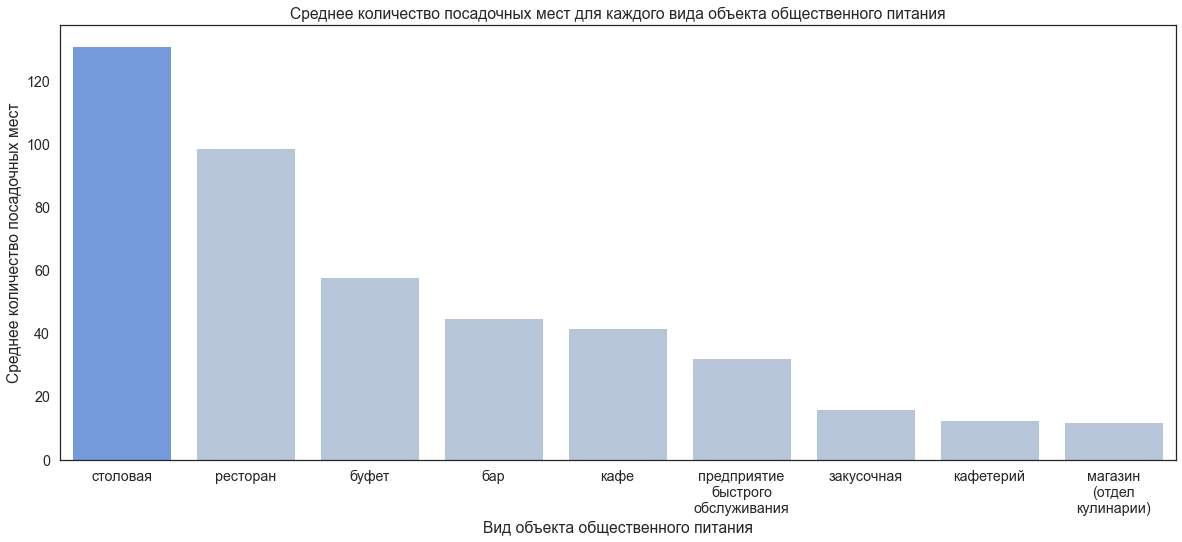

In [12]:
seat_number = (
    data
    .groupby('object_type')
    .agg({'number':'mean'})
    .reset_index()
    .sort_values(by='number', ascending=False)
)

display(seat_number)

#Задаем цвет, размер шрифта и размер графика
sns.set_theme(style="white", font_scale=1.3)
fig, ax = plt.subplots(figsize=(20, 8))

#Выделяем только победителя
values = chain_objects['chain_ratio']
clrs = ['lightsteelblue' if (x < max(values)) else 'cornflowerblue' for x in values]

#Строим график с подписями
sns.barplot(x='object_type', y='number', data=seat_number, palette=clrs)
ax.set_title('Среднее количество посадочных мест для каждого вида объекта общественного питания')
plt.xlabel(u'Вид объекта общественного питания')
plt.ylabel(u'Среднее количество посадочных мест')

#Делаем перенос длинных названий
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

wrap_labels(ax, 10)
ax.figure;

Как правило, в столовых наибольшее количество посадочных мест (около 131), далее идут рестораны (99) и буфеты (58), а замыкают список отделы кулинарии в магазинах (всего 12).

## Выделение улицы заведения в отдельный столбец.

In [13]:
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия', 'деревня', 
         'Зеленоград', 'квартал', 'микрорайон', 'посёлок', 'поселок', 'километр',
        'территория']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

data['street'] = data['address'].str.extract(str_pat)

missig_streets = data[data['street'].isna()]
display(missig_streets)

missig_streets['address'] = 'город Москва, ' + missig_streets['address']
missig_streets['street'] = missig_streets['address'].str.extract(str_pat)
data['street'] = data['street'].fillna(missig_streets['street'])

display(data)

,id,object_name,chain,object_type,address,number,street
859,23601,Буфет - ГБОУ СОШ № 64,нет,буфет,"Партизанская улица, дом 30",100,NaN
860,23604,Буфет - ГБОУ 60,нет,буфет,"Партизанская улица, дом 30",100,NaN
1491,25349,Ресторан «Гранатовый сад»,нет,ресторан,"Поречная улица, дом 5/14, строение 1",40,NaN
7691,132359,Кафе «La Carotte»,нет,кафе,"1-й Нагатинский проезд, дом 10",198,NaN
7827,28214,Роснефть (закрытое),нет,столовая,"Софийская набережная, дом 26/1, строение 1",80,NaN
...,...,...,...,...,...,...,...
13184,192903,Сабрина,нет,кафе,"Бауманская улица, дом 7, строение 3",30,NaN
13185,192918,Limassol,нет,кафе,"Бауманская улица, дом 7, строение 3",42,NaN
13399,204788,Крошка Картошка,да,предприятие быстрого обслуживания,"Солянский тупик, дом 1/4, строение 1",15,NaN
13991,204917,Шаурма на углях- Чайхана Баракат,нет,кафе,"Таганская площадь, дом 88, строение 4",80,NaN


C:\Users\moroz\AppData\Local\Temp\ipykernel_12968\506569483.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missig_streets['address'] = 'город Москва, ' + missig_streets['address']
C:\Users\moroz\AppData\Local\Temp\ipykernel_12968\506569483.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missig_streets['street'] = missig_streets['address'].str.extract(str_pat)


,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36,22-й километр


## Построение графика топ-10 улиц по количеству объектов общественного питания. 
В каких районах Москвы находятся эти улицы?

,street,object_name
1475,проспект Мира,192
708,Ленинградский проспект,160
1016,Пресненская набережная,156
1031,Профсоюзная улица,143
426,Варшавское шоссе,141
711,Ленинский проспект,138
1471,проспект Вернадского,130
1381,город Зеленоград,128
698,Кутузовский проспект,98
622,Каширское шоссе,97


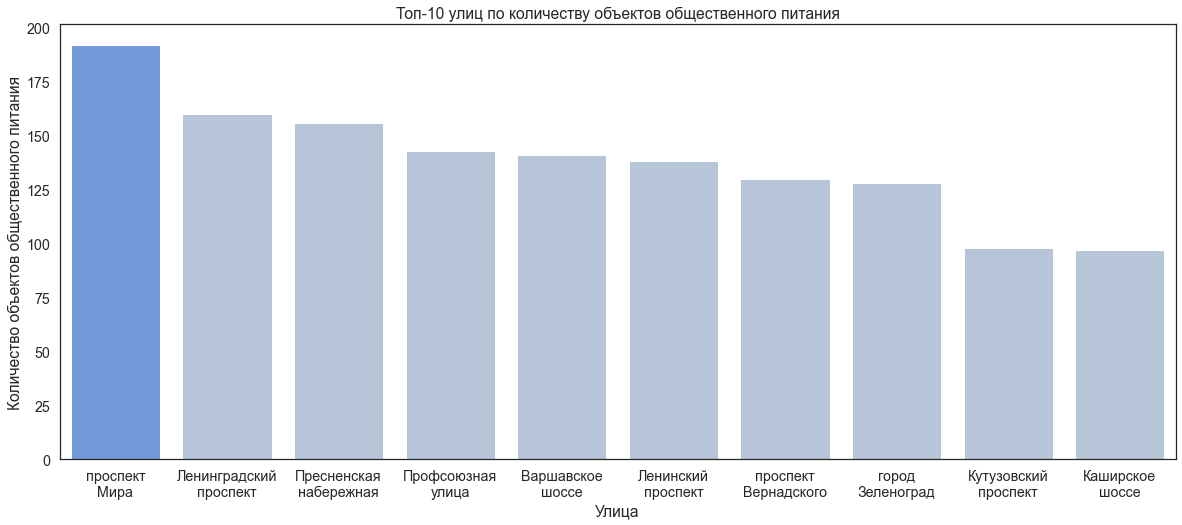

In [14]:
street_data = (
    data
    .groupby('street')
    .agg({'object_name':'count'})
    .reset_index()
    .sort_values(by='object_name', ascending=False)
    .head(10)
)

display(street_data)

#Задаем цвет, размер шрифта и размер графика
sns.set_theme(style="white", font_scale=1.3)
fig, ax = plt.subplots(figsize=(20, 8))

#Выделяем только победителя
values = street_data['object_name']
clrs = ['lightsteelblue' if (x < max(values)) else 'cornflowerblue' for x in values]

#Строим график с подписями
sns.barplot(x='street', y='object_name', data=street_data, palette=clrs)
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
plt.xlabel(u'Улица')
plt.ylabel(u'Количество объектов общественного питания')

#Делаем перенос длинных названий
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

wrap_labels(ax, 10)
ax.figure;

In [15]:
mosgaz_streets = pd.read_csv('https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv?sequence=1&isAllowed=y')

display(mosgaz_streets.head())

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [16]:
mosgaz_streets['streetname'] = mosgaz_streets['streetname'].str.strip(' ')
district_top_10 = mosgaz_streets.query('streetname in @street_data.street')
top_10_list = district_top_10['area'].unique()
print(f'Список районов данных улиц: {top_10_list}')

Список районов данных улиц: ['Пресненский район' 'Район Дорогомилово' 'Район Фили-Давыдково'
 'Район Проспект Вернадского' 'Район Раменки' 'Район Тропарево-Никулино'
 'Район Крюково' 'Район Матушкино-Савелки' 'Панфиловский район'
 'Район Аэропорт' 'Район Беговой' 'Хорошевский район' 'Район Сокол'
 'Алексеевский район' 'Ярославский Район' 'Район Марьина роща'
 'Останкинский район' 'Район Ростокино' 'Район Свиблово'
 'Район Чертаново Центральное' 'Район Чертаново Северное'
 'Район Чертаново Южное' 'Донской район' 'Район Москворечье-Сабурово'
 'Район Нагатино-Садовники' 'Нагорный район'
 'Район Орехово-Борисово Южное' 'Район Орехово-Борисово Северное'
 'Академический район' 'Район Черемушки' 'Район Гагаринский'
 'Район Ясенево' 'Район Коньково' 'Ломоносовский район'
 'Обручевский район' 'Район Северное Бутово' 'Район Теплый Стан'
 'Район Южное Бутово' 'Район Якиманка' 'Мещанский район']


Больше всего объектов общественного питания находится на проспекте Мира. 

Неудивительно, это самые длинные улицы Москвы, к тому же, начинающиеся близко к центру и проходящие через большие спальные районы.

## Число улиц с одним объектом общественного питания. 
В каких районах Москвы находятся эти улицы?

In [17]:
single_object_data = (
    data
    .groupby('street')
    .agg({'object_name':'count'})
    .reset_index()
    .sort_values(by='object_name', ascending=True)
)
single_object_data = single_object_data[single_object_data['object_name'] == 1]

display(single_object_data.head())

single_object_data_len = len(single_object_data['street'])

print(f'Число улиц с одним объектом общественного питания: {single_object_data_len}')

,street,object_name
976,Петроверигский переулок,1
1417,переулок Красина,1
1416,переулок Васнецова,1
614,Каргопольская улица,1
615,Карельский бульвар,1


Число улиц с одним объектом общественного питания: 601


In [18]:
district_single_object = mosgaz_streets.query('streetname in @single_object_data.street')
single_object_list = district_single_object['area'].unique()
print(f'Список районов данных улиц: {single_object_list}')

Список районов данных улиц: ['Пресненский район' 'Таганский район' 'Тверской район' 'Район Арбат'
 'Район Замоскворечье' 'Район Богородское' 'Район Гольяново'
 'Район Измайлово' 'Район Косино-Ухтомский' 'Басманный район'
 'Район Метрогородок' 'Район Новогиреево' 'Район Перово'
 'Район Преображенское' 'Район Северное Измайлово' 'Район Соколиная Гора'
 'Район Вешняки' 'Район Восточное Измайлово' 'Район Восточный'
 'Район Сокольники' 'Район Дорогомилово' 'Район Филевский Парк'
 'Район Фили-Давыдково' 'Район Кунцево' 'Можайский Район'
 'Район Ново-Переделкино' 'Район Очаково-Матвеевское' 'Район Раменки'
 'Район Солнцево' 'Район Внуково' 'Район Крюково'
 'Район Матушкино-Савелки' 'Панфиловский район' 'Район Аэропорт'
 'Район Беговой' 'Бескудниковский Район' 'Дмитровский район'
 'Головинский район' 'Хорошевский район' 'Район Коптево'
 'Район Левобережный' 'Молжаниновский район' 'Савеловский район'
 'Район Сокол' 'Тимирязевский Район' 'Войковский Район'
 'Район Западное Дегунино' 'Алексеевски

Улицы с одним заведением общественного питания короткие и находятся по всей Москве.

In [19]:
#data_top_10 = data.query('street in @street_data.street')
#data_single_object = data.query('street in @single_object_data.street')

#data_top_10.to_excel (r'C:\Users\moroz\Desktop\data_top_10.xlsx', index = False, header=True)
#data_single_object.to_excel (r'C:\Users\moroz\Desktop\data_single_object.xlsx', index = False, header=True)

Интерактивная карта: <https://www.google.com/maps/d/edit?mid=1bDG5ekhPlViPZt5OJJA0wjbZDh_835E&usp=sharing>

# Вывод.
Больше всего заведений типа "кафе" (их 5789) , вдвое меньше "столовая" (2568) и "ресторан" (2240 заведений). Остальные типа заведений составляют менее значительную часть от общего числа.

В 4 раза больше несетевых заведений (11045) , чем сетевых (2700).

Для предприятий быстрого обслуживания наиболее характерно сетевое распространение (больше половины заведений этого типа), большинство остальных типов общепита на 70-80% состоят из несетвых точек.

Для сетевых общепитов характерно характерно небольшое (1-20 точек) количество заведений с большим (до 250) количеством посадочных мест.

Как правило, в столовых наибольшее количество посадочных мест (около 131), далее идут рестораны (99) и буфеты (58), а замыкают список отделы кулинарии в магазинах (всего 12).

Несетевые заведения располагаются по всей Москве, но не часто встречаются на крупных улицах.
Сетевые же заведения чаще всего располагаются вдоль крупнейших улиц Москвы в ЦАО, САО, ЗАО и ЮАО.

Концепция небольшого кафе с роботами-официантами вписывается в наиболее популярные виды предприятий общественного питания. Кафе наиболее популярный тип общепита, в таких местах гости сидят подолгу и не будут мешать передвижению роботов, что сложно представить в ресторанах быстрого питания. Чаще можно встретить несетевые заведения с примерно 40 посадочными местами. Такое количество гостей должно быть по силам нескольким роботам-официантам.

Ссылка на презентацию: <https://drive.google.com/file/d/1hhzk47qYYcQdoclaOP8v7eqkD8mE5qHR/view?usp=sharing>